<a 
href="https://colab.research.google.com/github/adilo231/Python-for-machine-learning/blob/main/Exercices Global/Exercices Global/TitanicDataset.ipynb" 
target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format='{:.4f}'.format
style.use('ggplot')

# Load the Data set

In [6]:
#Loading the dataset
data = pd.read_excel('Datasets/titanic3.xls')

#Print the first 5 rows of the dataframe.
df= data.copy()
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0000,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# DEA Data Explatory Analysis
## Forme Analysis

In [8]:
df.shape

(1309, 14)

In [9]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.0000,1309.0000,1046.0000,1309.0000,1309.0000,1308.0000,121.0000
mean,2.2949,0.3820,29.8811,0.4989,0.3850,33.2955,160.8099
std,0.8378,0.4861,14.4135,1.0417,0.8656,51.7587,97.6969
min,1.0000,0.0000,0.1667,0.0000,0.0000,0.0000,1.0000
25%,2.0000,0.0000,21.0000,0.0000,0.0000,7.8958,72.0000
50%,3.0000,0.0000,28.0000,0.0000,0.0000,14.4542,155.0000
75%,3.0000,1.0000,39.0000,1.0000,0.0000,31.2750,256.0000
max,3.0000,1.0000,80.0000,8.0000,9.0000,512.3292,328.0000


object     7
int64      4
float64    3
dtype: int64

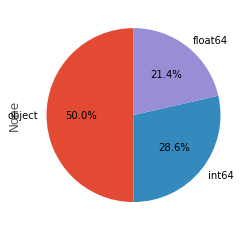

In [7]:
df.dtypes.value_counts().plot.pie(autopct='%1.1f%%',startangle=90)
df.dtypes.value_counts()


In [9]:
df.isna().sum()

pclass          0
survived        0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [10]:
Col_useless = ['name','cabin','boat','body','home.dest','ticket']

In [11]:
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [40]:
df['age'].fillna(df['age'].mean(), inplace = True)

df.dropna(1,inplace=True)

In [18]:
df.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
ticket      0
dtype: int64

## Data Preprocessing

In [12]:
df= data.copy()
df.drop(['name','cabin','boat','body','home.dest','ticket'],axis=1,inplace=True)
df['age'].fillna(df['age'].mean(), inplace = True)
df.dropna(1,inplace=True)

X= df.drop('survived',1)
y=df['survived']

num_col = X.select_dtypes(exclude=['object']).columns
cat_col = X.select_dtypes(include=['object']).columns



In [21]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer




preprocessor = make_column_transformer((StandardScaler(), num_col))

                                     

X[num_col] =  preprocessor.fit_transform(X)

preprocessor = make_column_transformer((OrdinalEncoder(), ['sex']))

X['sex'] =  preprocessor.fit_transform(X)
        


In [22]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8,random_state=42, stratify=y)


# Model Selection

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [24]:
from tqdm import tqdm
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])

lst_1= []

for m in tqdm(range(len(models))):
    lst_2= []
    model = models[m][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
 
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

100%|██████████| 8/8 [00:02<00:00,  3.17it/s]


In [25]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
1,SVM,80.1527,78.5613,8.4032,0.7854,0.7513,0.7175,0.7340
0,Logistic Regreesion,80.1527,76.2536,9.0402,0.7778,0.7743,0.6775,0.7227
4,BernoulliNB,78.4351,74.7293,6.1598,0.7606,0.7458,0.6600,0.7003
2,KNeighbors,76.6221,76.6239,9.1817,0.7402,0.7221,0.6300,0.6729
6,Random Forest,76.2405,75.0997,8.9625,0.7509,0.6837,0.7025,0.6930
7,XGBoost,75.2863,75.4843,9.8921,0.7317,0.6890,0.6425,0.6649
5,Decision Tree,74.3321,72.0798,10.8264,0.7283,0.6633,0.6650,0.6642
3,GaussianNB,74.2366,70.8832,5.9884,0.7419,0.6407,0.7400,0.6868


# models Fine tuning

In [26]:
from sklearn.model_selection import GridSearchCV

grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]), 
               (GaussianNB(),[{'var_smoothing': [1e-09]}]), 
               (BernoulliNB(), [{'alpha': [0.25, 0.5, 1]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]), 
              (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]

In [27]:
from sklearn.model_selection import ShuffleSplit,StratifiedKFold,LeaveOneOut
lst_1= []
modeles =[]

k=0
for i,j in tqdm(grid_models):
    lst_2= []
    cv =LeaveOneOut()
    grid = GridSearchCV(estimator=i,param_grid = j,scoring='precision',cv = cv)
    grid.fit(X_train, y_train)
    model = grid.best_estimator_
    y_pred = model.predict(X_test)
   
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = cv)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    
    modeles.append(model)
    lst_2.append(models[k][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)
    print(lst_2)
    k+=1

 12%|█▎        | 1/8 [00:09<01:05,  9.33s/it]

['Logistic Regreesion', 79.48473282442748, 75.86206896551724, 42.79197808962365, 0.7709567901234567, 0.7635327635327636, 0.67, 0.7137150466045273]


 25%|██▌       | 2/8 [00:32<01:43, 17.27s/it]

['SVM', 78.72137404580153, 77.39463601532567, 41.82743020540255, 0.763348765432099, 0.7507082152974505, 0.6625, 0.7038512616201859]


 38%|███▊      | 3/8 [00:51<01:31, 18.21s/it]

['KNeighbors', 80.1526717557252, 78.544061302682, 41.051632907214945, 0.7844907407407407, 0.753968253968254, 0.7125, 0.7326478149100257]


 50%|█████     | 4/8 [00:53<00:46, 11.70s/it]

['GaussianNB', 74.23664122137404, 70.49808429118774, 45.6051372149165, 0.7419135802469136, 0.6406926406926406, 0.74, 0.6867749419953597]


 62%|██████▎   | 5/8 [00:56<00:26,  8.83s/it]

['BernoulliNB', 78.43511450381679, 73.18007662835248, 44.302190098275126, 0.7605555555555557, 0.7457627118644068, 0.66, 0.7002652519893899]


 75%|███████▌  | 6/8 [00:59<00:13,  6.82s/it]

['Decision Tree', 75.28625954198473, 72.79693486590038, 44.500559105699956, 0.7374845679012345, 0.6775818639798489, 0.6725, 0.6750313676286073]


 88%|████████▊ | 7/8 [07:44<02:16, 136.94s/it]

['Random Forest', 75.85877862595419, 74.32950191570882, 43.68152168289838, 0.7473765432098765, 0.6779661016949152, 0.7, 0.6888068880688807]


100%|██████████| 8/8 [08:28<00:00, 63.52s/it] 

['XGBoost', 74.23664122137404, 76.24521072796935, 42.55806520325475, 0.7227777777777779, 0.6701570680628273, 0.64, 0.6547314578005116]


In [28]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
2,KNeighbors,80.1527,78.5441,41.0516,0.7845,0.7540,0.7125,0.7326
0,Logistic Regreesion,79.4847,75.8621,42.7920,0.7710,0.7635,0.6700,0.7137
1,SVM,78.7214,77.3946,41.8274,0.7633,0.7507,0.6625,0.7039
4,BernoulliNB,78.4351,73.1801,44.3022,0.7606,0.7458,0.6600,0.7003
6,Random Forest,75.8588,74.3295,43.6815,0.7474,0.6780,0.7000,0.6888
5,Decision Tree,75.2863,72.7969,44.5006,0.7375,0.6776,0.6725,0.6750
7,XGBoost,74.2366,76.2452,42.5581,0.7228,0.6702,0.6400,0.6547
3,GaussianNB,74.2366,70.4981,45.6051,0.7419,0.6407,0.7400,0.6868


In [80]:
lst_2=[]
param= {'n_neighbors':range(1,15), 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}
grid = GridSearchCV(estimator=KNeighborsClassifier(),param_grid = param,scoring='precision',cv = 20)
grid.fit(X_train, y_train)
model = grid.best_estimator_
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 20)   #K-Fold Validation
roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)  #F1 Score


lst_2.append((accuracy_score(y_test, y_pred))*100) 
lst_2.append(accuracies.mean()*100)
lst_2.append(accuracies.std()*100)
lst_2.append(roc)
lst_2.append(precision)
lst_2.append(recall)
lst_2.append(f1)

print(lst_2)

[79.77099236641222, 77.03296703296704, 10.249278001556698, 0.7665740740740741, 0.79375, 0.635, 0.7055555555555555]


In [81]:
grid.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

# for competition

In [68]:
trainSet= pd.read_csv('Datasets/train.csv',index_col='PassengerId')
TestSet = pd.read_csv('Datasets/test.csv',index_col='PassengerId')
TestSet.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5000,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0000,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0000,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0000,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0000,1,1,3101298,12.2875,NaN,S


In [69]:

trainSet.drop(['Name','Cabin','Ticket'],axis=1,inplace=True)
trainSet['Age'].fillna(trainSet['Age'].mean(), inplace = True)
trainSet.dropna(0,inplace=True)

TestSet.drop(['Name','Cabin','Ticket'],axis=1,inplace=True)
TestSet['Age'].fillna(TestSet['Age'].mean(), inplace = True)
TestSet.dropna(0,inplace=True)

X= trainSet.drop('Survived',1)
y=trainSet['Survived']

X_test= TestSet

num_col = X.select_dtypes(exclude=['object']).columns
cat_col = X.select_dtypes(include=['object']).columns



In [75]:
trainSet

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0000,1,0,7.2500,S
2,1,1,female,38.0000,1,0,71.2833,C
3,1,3,female,26.0000,0,0,7.9250,S
4,1,1,female,35.0000,1,0,53.1000,S
5,0,3,male,35.0000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0000,0,0,13.0000,S
888,1,1,female,19.0000,0,0,30.0000,S
889,0,3,female,29.6991,1,2,23.4500,S


In [71]:

from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

preprocessor_num = make_column_transformer((StandardScaler(), num_col))                           
preprocessor_cat = make_column_transformer((OrdinalEncoder(), cat_col))
X[num_col] =  preprocessor_num.fit_transform(X)
X[cat_col] =  preprocessor_cat.fit_transform(X)

X_test[num_col] =  preprocessor_num.fit_transform(X_test)
X_test[cat_col] =  preprocessor_cat.fit_transform(X_test)

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.9,random_state=42, stratify=y)

In [81]:
lst_1= []

for m in tqdm(range(len(models))):
    lst_2= []
    model = models[m][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
 
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)
df

100%|██████████| 8/8 [00:02<00:00,  3.23it/s]


,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
0,Logistic Regreesion,75.9051,77.3611,11.0073,0.7264,0.7287,0.5882,0.6510
2,KNeighbors,75.4057,67.0833,14.3540,0.7224,0.7171,0.5882,0.6463
6,Random Forest,73.2834,68.0556,15.1764,0.7052,0.6716,0.5882,0.6272
3,GaussianNB,73.0337,73.8889,11.0554,0.7070,0.6596,0.6078,0.6327
1,SVM,73.0337,73.7500,12.4915,0.6789,0.7344,0.4608,0.5663
7,XGBoost,72.6592,68.0556,15.9692,0.6989,0.6617,0.5817,0.6191
4,BernoulliNB,72.4095,71.5278,11.5412,0.6969,0.6568,0.5817,0.6170
5,Decision Tree,71.5356,69.3056,16.1786,0.6873,0.6444,0.5686,0.6042


In [77]:
lst_2=[]
param= {'n_neighbors':range(1,15), 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}
grid = GridSearchCV(estimator=KNeighborsClassifier(),param_grid = param,scoring='precision',cv = 20)
grid.fit(X_train, y_train)
model = grid.best_estimator_
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 20)   #K-Fold Validation
roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)  #F1 Score


lst_2.append((accuracy_score(y_test, y_pred))*100) 
lst_2.append(accuracies.mean()*100)
lst_2.append(accuracies.std()*100)
lst_2.append(roc)
lst_2.append(precision)
lst_2.append(recall)
lst_2.append(f1)

print(lst_2)

[75.14044943820225, 76.80555555555554, 12.060962689091378, 0.6991978609625669, 0.7878787878787878, 0.47794117647058826, 0.5949656750572082]


In [46]:
X_test


,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
203,3,1.0,0.351305,0,0,-0.512060
599,3,1.0,0.019486,0,0,-0.497766
307,1,0.0,0.019486,0,0,1.534146
482,2,1.0,0.019486,0,0,-0.639391
181,3,0.0,0.019486,8,2,0.723930
...,...,...,...,...,...,...
408,2,1.0,-2.040388,1,1,-0.271853
769,3,1.0,0.019486,1,0,-0.166002
37,3,1.0,0.019486,0,0,-0.497684


In [53]:
y_pred = model.predict(X_test)
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
203,3,1.0,0.351305,0,0,-0.512060
599,3,1.0,0.019486,0,0,-0.497766
307,1,0.0,0.019486,0,0,1.534146
482,2,1.0,0.019486,0,0,-0.639391
181,3,0.0,0.019486,8,2,0.723930
...,...,...,...,...,...,...
408,2,1.0,-2.040388,1,1,-0.271853
769,3,1.0,0.019486,1,0,-0.166002
37,3,1.0,0.019486,0,0,-0.497684


In [50]:
sub = {'PassengerId': X_test.index,'Survived': y_pred }
sub = pd.DataFrame(data=sub)

In [54]:
sub.to_csv('submission.csv', index = False)